# **Filters**

<ipython-input-4-8e9a550232d2>:28: RuntimeWarning: invalid value encountered in cast
  wiener_filtered = np.uint8(wiener(gray_image, (5, 5)))


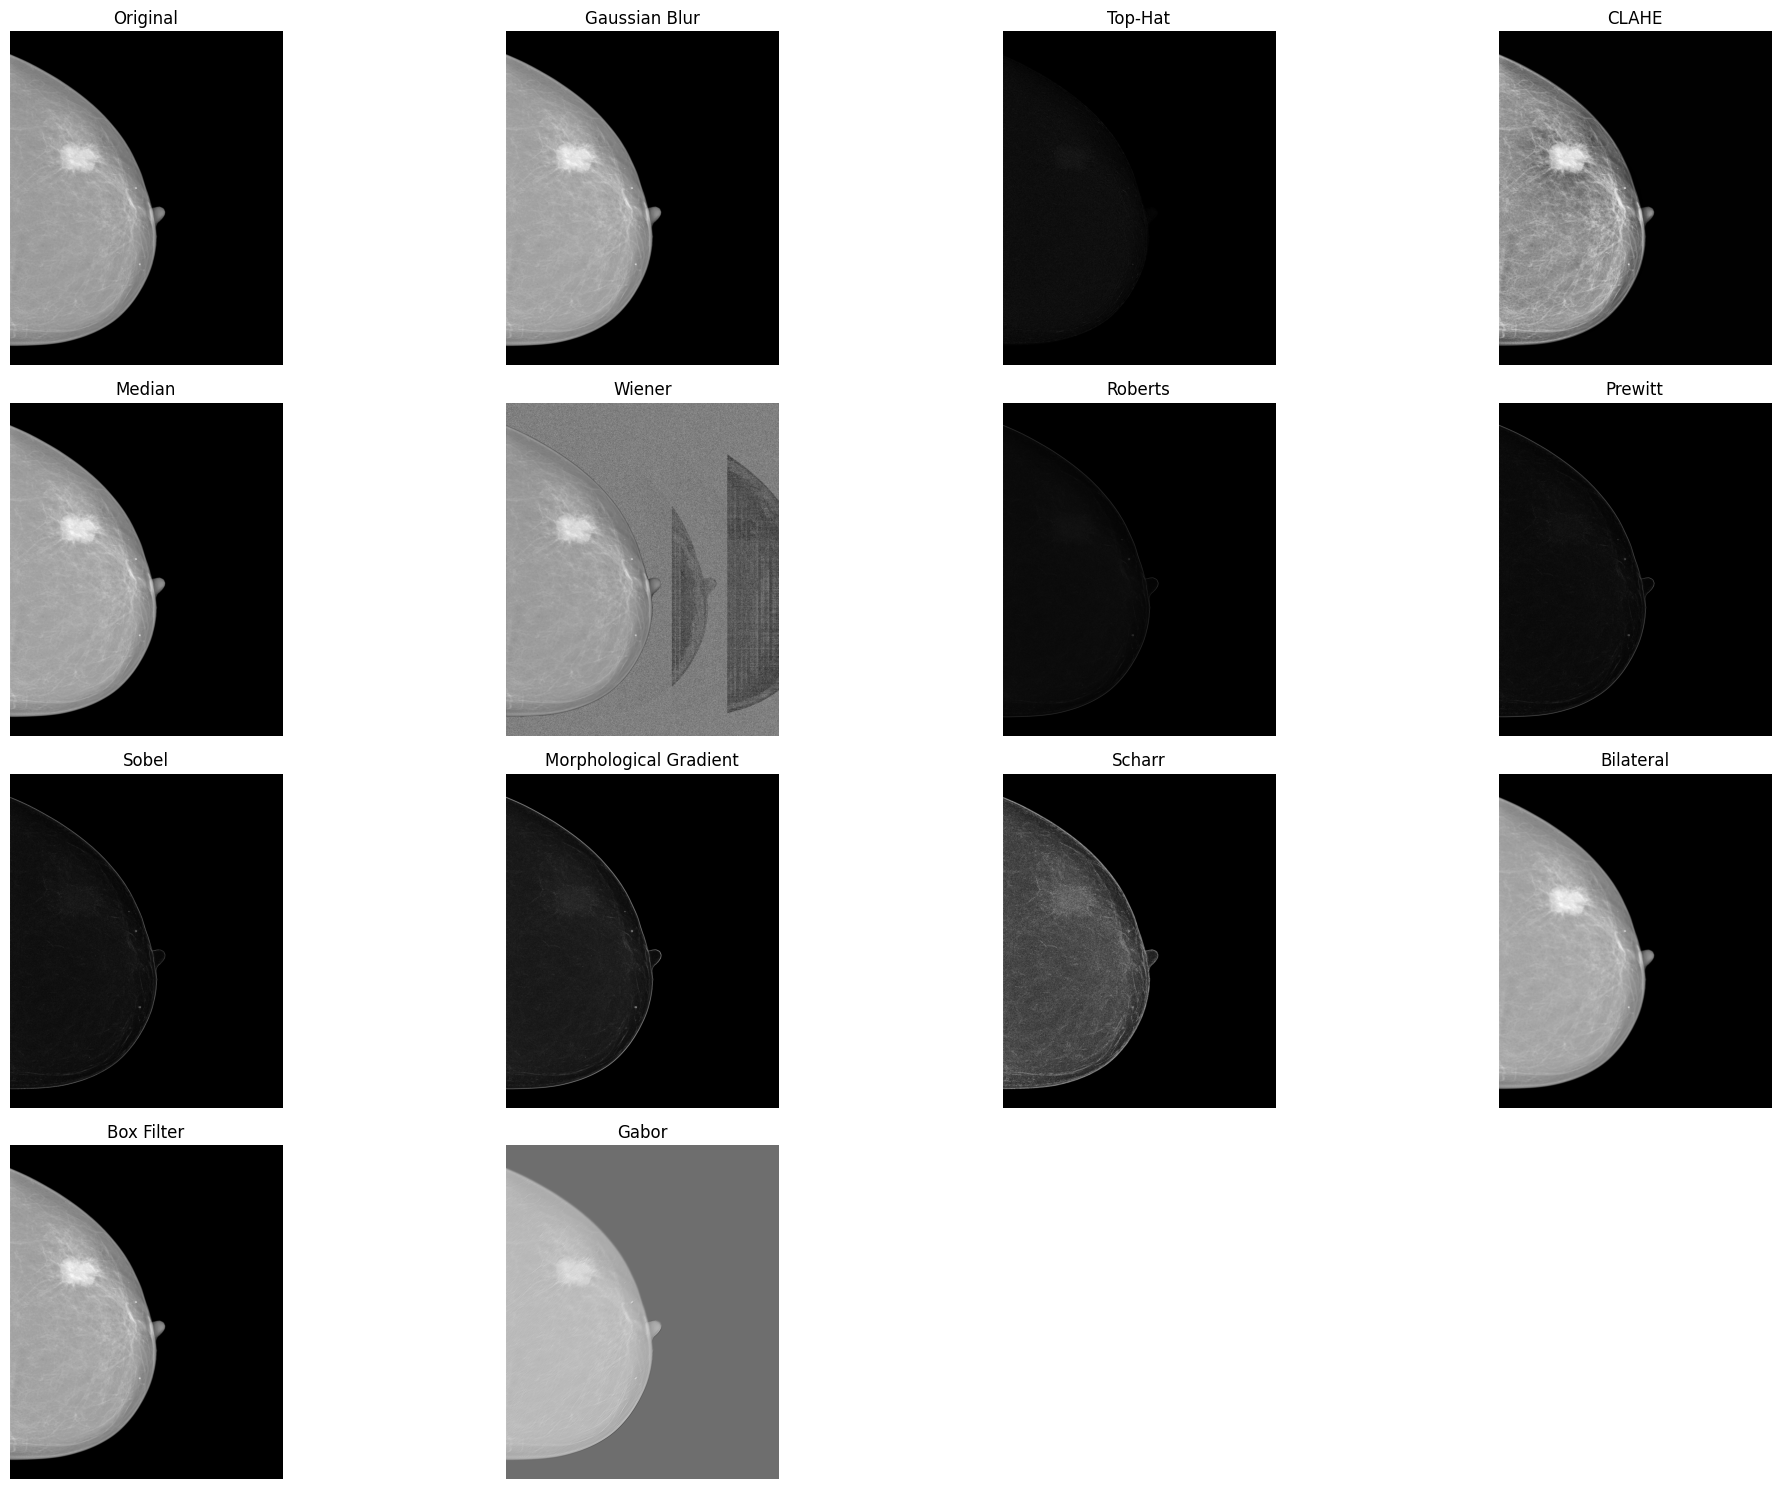

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import wiener

# Read the image in grayscale
image_path = '/content/24055355_5.png'  # Replace with your image path
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define a kernel for morphological operations
morph_kernel = np.ones((5, 5), np.uint8)

# Filters
# Gaussian Blur
gaussian_blur = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Top-Hat (Highlight bright regions on a dark background)
tophat = cv2.morphologyEx(gray_image, cv2.MORPH_TOPHAT, morph_kernel)

# CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(gray_image)

# Median Filter
median_filtered = cv2.medianBlur(gray_image, 5)

# Wiener Filter
wiener_filtered = np.uint8(wiener(gray_image, (5, 5)))

# Roberts Filter
roberts_kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
roberts_kernel_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)
roberts_x = cv2.filter2D(gray_image, cv2.CV_64F, roberts_kernel_x)
roberts_y = cv2.filter2D(gray_image, cv2.CV_64F, roberts_kernel_y)
roberts = np.uint8(np.sqrt(roberts_x**2 + roberts_y**2))

# Prewitt Filter
prewitt_kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float32)
prewitt_kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)
prewitt_x = cv2.filter2D(gray_image, cv2.CV_64F, prewitt_kernel_x)
prewitt_y = cv2.filter2D(gray_image, cv2.CV_64F, prewitt_kernel_y)
prewitt = np.uint8(np.sqrt(prewitt_x**2 + prewitt_y**2))

# Sobel Filter
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel = np.uint8(np.sqrt(sobel_x**2 + sobel_y**2))

# Modified Morphological Gradient
dilated_image = cv2.dilate(gray_image, morph_kernel)
eroded_image = cv2.erode(gray_image, morph_kernel)
morphological_gradient = cv2.subtract(dilated_image, eroded_image)

# Scharr Filter
scharr_x = cv2.Scharr(gray_image, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(gray_image, cv2.CV_64F, 0, 1)
scharr = np.uint8(np.sqrt(scharr_x**2 + scharr_y**2))

# Bilateral Filter
bilateral_filtered = cv2.bilateralFilter(gray_image, d=15, sigmaColor=75, sigmaSpace=75)

# Box Filter
box_filtered = cv2.blur(gray_image, (5, 5))

# Gabor Filter
ksize = 31
sigma = 4.0
lamda = 10.0
gamma = 0.5
phi = 0
theta = np.pi / 4
gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
gabor_filtered = cv2.filter2D(gray_image, cv2.CV_32F, gabor_kernel)
gabor_filtered = cv2.normalize(gabor_filtered, None, 0, 255, cv2.NORM_MINMAX)
gabor_filtered_uint8 = np.uint8(gabor_filtered)

# Store all filters for visualization
filters = [
    ("Original", gray_image),
    ("Gaussian Blur", gaussian_blur),
    ("Top-Hat", tophat),
    ("CLAHE", clahe_image),
    ("Median", median_filtered),
    ("Wiener", wiener_filtered),
    ("Roberts", roberts),
    ("Prewitt", prewitt),
    ("Sobel", sobel),
    ("Morphological Gradient", morphological_gradient),
    ("Scharr", scharr),
    ("Bilateral", bilateral_filtered),
    ("Box Filter", box_filtered),
    ("Gabor", gabor_filtered_uint8),
]

# Plot all filters in a grid
plt.figure(figsize=(20, 15))
for i, (name, img) in enumerate(filters):
    plt.subplot(4, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(name)
    plt.axis('off')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/scipy/signal/_signaltools.py:1659: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
/usr/local/lib/python3.10/dist-packages/scipy/signal/_signaltools.py:1659: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)
<ipython-input-3-e841c0264bc4>:25: RuntimeWarning: invalid value encountered in cast
  wiener_filtered = np.uint8(wiener(gray_image, (5, 5)))


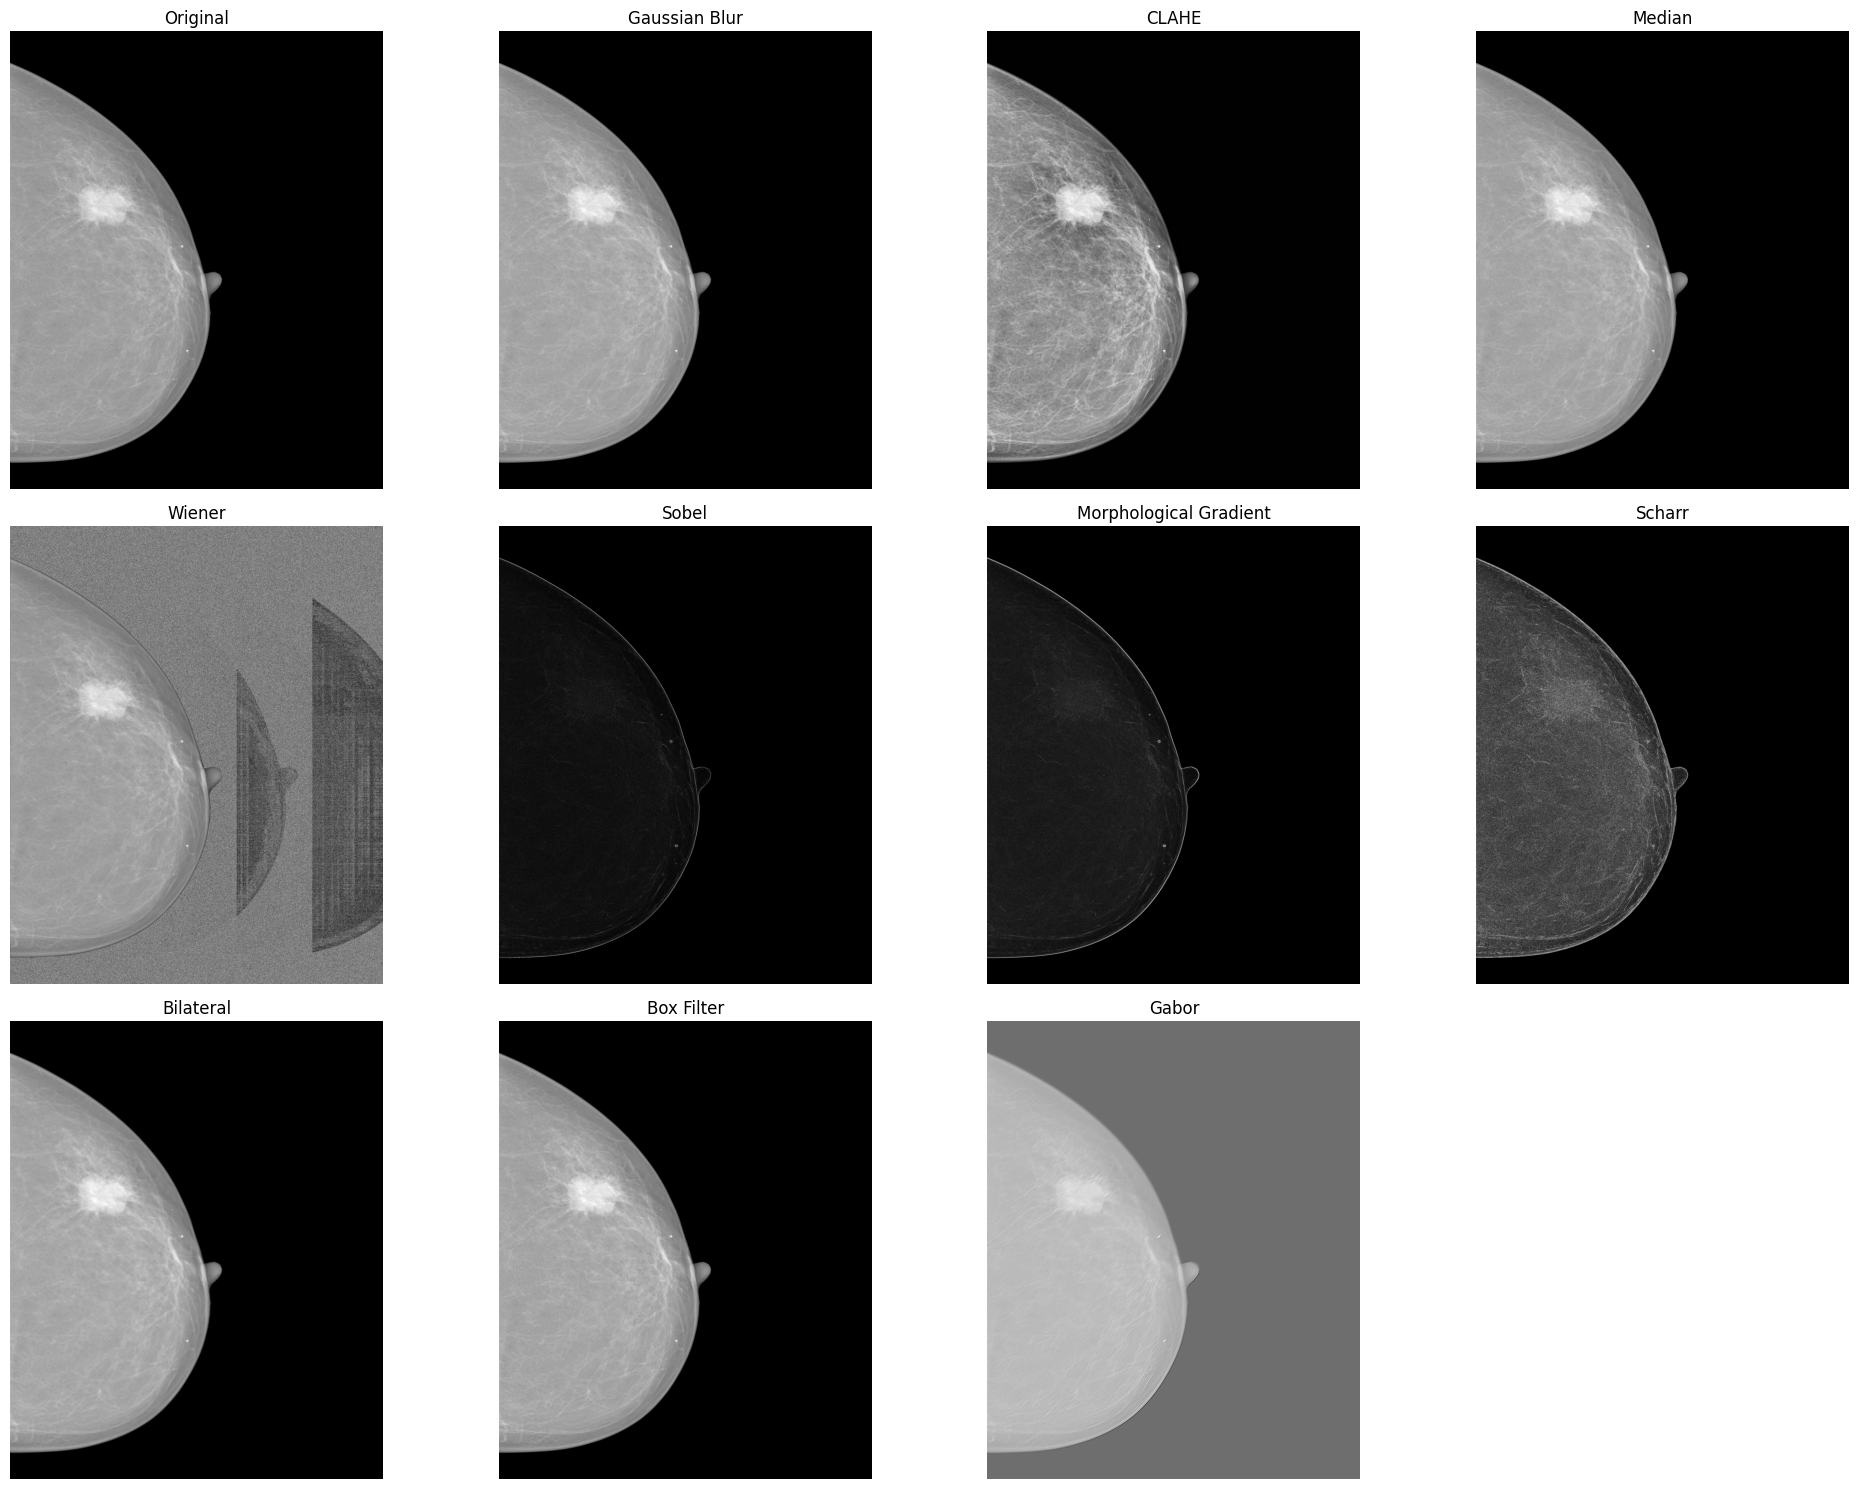

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import wiener

# Read the image in grayscale
image_path = '/content/24055355_5.png'  # Replace with your image path
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define a kernel for morphological operations
morph_kernel = np.ones((5, 5), np.uint8)

# Filters
# Gaussian Blur
gaussian_blur = cv2.GaussianBlur(gray_image, (5, 5), 0)

# CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(gray_image)

# Median Filter
median_filtered = cv2.medianBlur(gray_image, 5)

# Wiener Filter
wiener_filtered = np.uint8(wiener(gray_image, (5, 5)))

# Sobel Filter
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel = np.uint8(np.sqrt(sobel_x**2 + sobel_y**2))

# Modified Morphological Gradient
dilated_image = cv2.dilate(gray_image, morph_kernel)
eroded_image = cv2.erode(gray_image, morph_kernel)
morphological_gradient = cv2.subtract(dilated_image, eroded_image)

# Scharr Filter
scharr_x = cv2.Scharr(gray_image, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(gray_image, cv2.CV_64F, 0, 1)
scharr = np.uint8(np.sqrt(scharr_x**2 + scharr_y**2))

# Bilateral Filter
bilateral_filtered = cv2.bilateralFilter(gray_image, d=15, sigmaColor=75, sigmaSpace=75)

# Box Filter
box_filtered = cv2.blur(gray_image, (5, 5))

# Gabor Filter
ksize = 31
sigma = 4.0
lamda = 10.0
gamma = 0.5
phi = 0
theta = np.pi / 4
gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
gabor_filtered = cv2.filter2D(gray_image, cv2.CV_32F, gabor_kernel)
gabor_filtered = cv2.normalize(gabor_filtered, None, 0, 255, cv2.NORM_MINMAX)
gabor_filtered_uint8 = np.uint8(gabor_filtered)

# Store all filters for visualization
filters = [
    ("Original", gray_image),
    ("Gaussian Blur", gaussian_blur),
    ("CLAHE", clahe_image),
    ("Median", median_filtered),
    ("Wiener", wiener_filtered),
    ("Sobel", sobel),
    ("Morphological Gradient", morphological_gradient),
    ("Scharr", scharr),
    ("Bilateral", bilateral_filtered),
    ("Box Filter", box_filtered),
    ("Gabor", gabor_filtered_uint8),
]

# Plot all filters in a grid
plt.figure(figsize=(20, 15))
for i, (name, img) in enumerate(filters):
    plt.subplot(3, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(name)
    plt.axis('off')

plt.tight_layout()
plt.show()


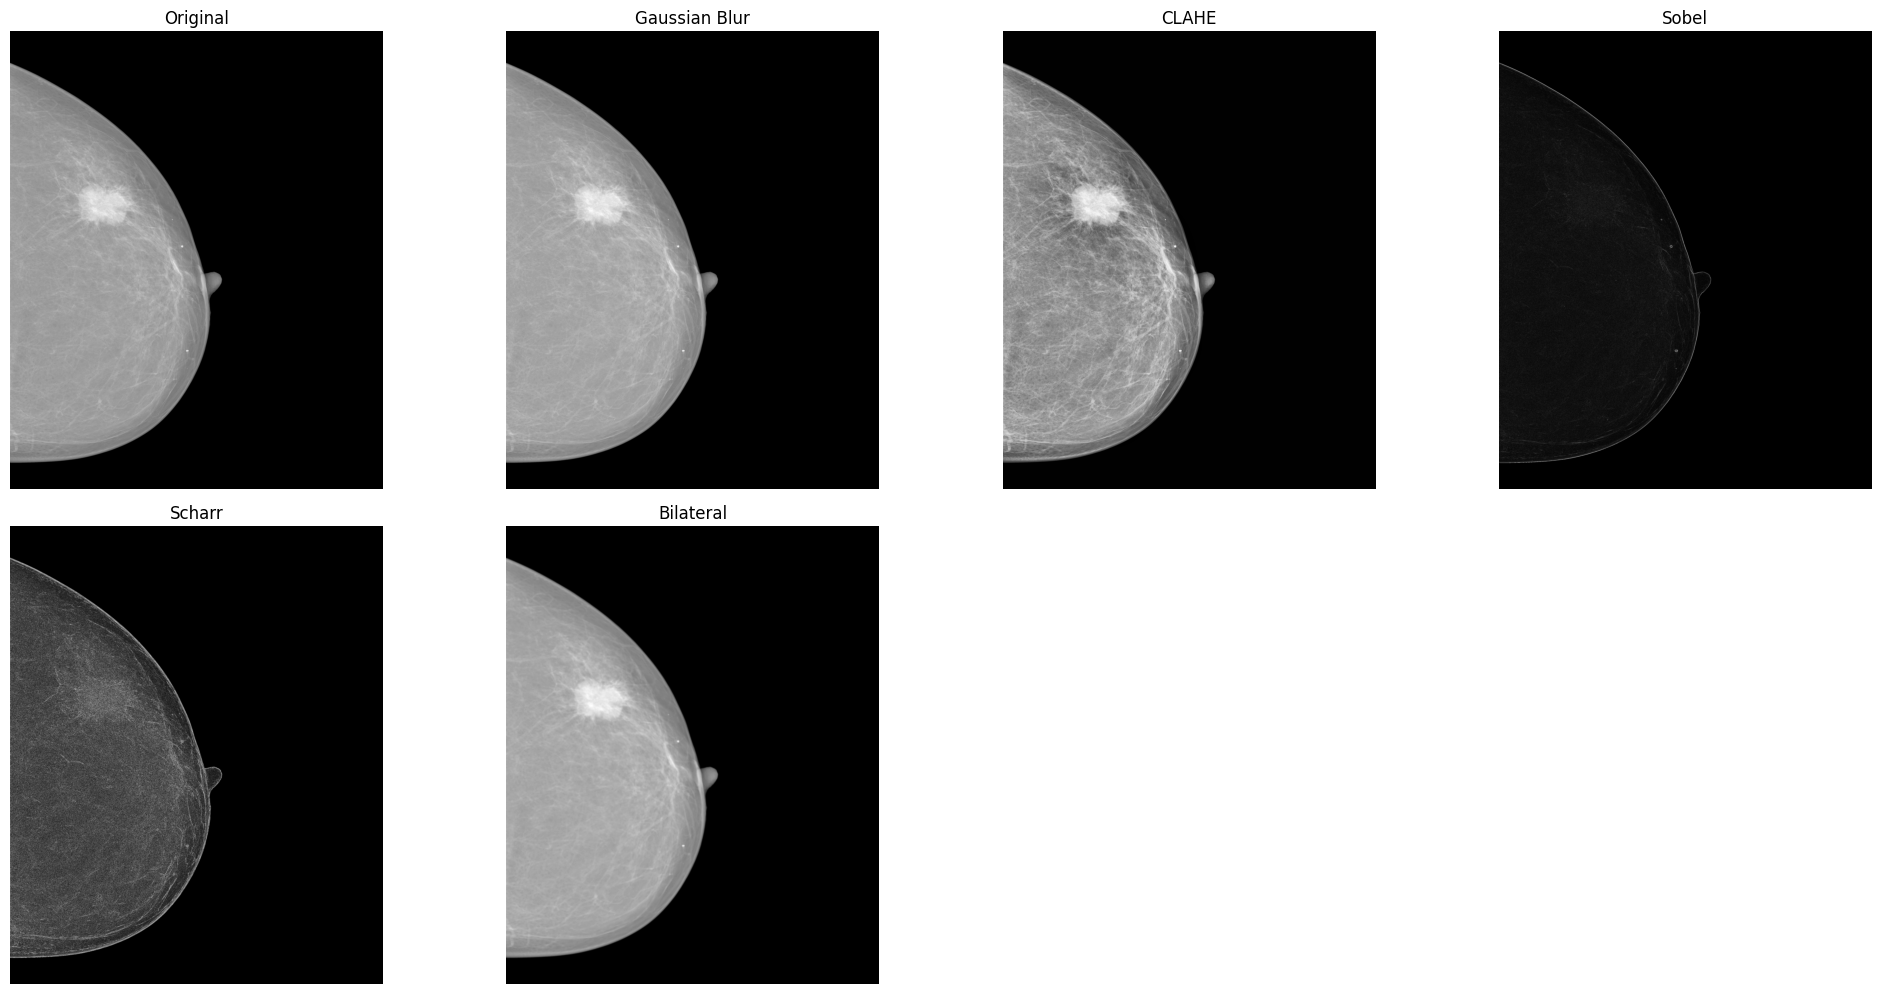

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import wiener

# Read the image in grayscale
image_path = '/content/24055355_5.png'  # Replace with your image path
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Filters
# Gaussian Blur
gaussian_blur = cv2.GaussianBlur(gray_image, (5, 5), 0)

# CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(gray_image)

# Sobel Filter
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel = np.uint8(np.sqrt(sobel_x**2 + sobel_y**2))

# Scharr Filter
scharr_x = cv2.Scharr(gray_image, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(gray_image, cv2.CV_64F, 0, 1)
scharr = np.uint8(np.sqrt(scharr_x**2 + scharr_y**2))

# Bilateral Filter
bilateral_filtered = cv2.bilateralFilter(gray_image, d=15, sigmaColor=75, sigmaSpace=75)

# Store all filters for visualization
filters = [
    ("Original", gray_image),
    ("Gaussian Blur", gaussian_blur),
    ("CLAHE", clahe_image),
    ("Sobel", sobel),
    ("Scharr", scharr),
    ("Bilateral", bilateral_filtered),
]

# Plot all filters in a grid
plt.figure(figsize=(20, 15))
for i, (name, img) in enumerate(filters):
    plt.subplot(3, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(name)
    plt.axis('off')

plt.tight_layout()
plt.show()
